In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

C:\Users\soham\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline

In [3]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.costs = []
        
    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) * np.random.randn()
        self.bias = np.random.randn()
        
        for _ in range(self.n_iters):
            diff = np.dot(X, self.weights) + self.bias - Y
            dw = np.dot(X.T, diff) / n_samples
            db = np.sum(diff) / n_samples
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            self.costs.append(sum(diff**2)/n_samples)
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [4]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
cor = df.corr()
cor.loc['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [6]:
df = df[['LotArea', 'GrLivArea', 'OverallQual', 'YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageYrBlt', 'SalePrice']].apply(lambda x: x/10000)

In [7]:
df.head()

,LotArea,GrLivArea,OverallQual,YearRemodAdd,YearBuilt,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,GarageArea,GarageYrBlt,SalePrice
0,0.845,0.1710,0.0007,0.2003,0.2003,0.0008,0.0856,0.0856,0.0548,0.2003,20.85
1,0.960,0.1262,0.0006,0.1976,0.1976,0.0006,0.1262,0.1262,0.0460,0.1976,18.15
2,1.125,0.1786,0.0007,0.2002,0.2001,0.0006,0.0920,0.0920,0.0608,0.2001,22.35
3,0.955,0.1717,0.0007,0.1970,0.1915,0.0007,0.0961,0.0756,0.0642,0.1998,14.00
4,1.426,0.2198,0.0008,0.2000,0.2000,0.0009,0.1145,0.1145,0.0836,0.2000,25.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   float64
 1   GrLivArea     1460 non-null   float64
 2   OverallQual   1460 non-null   float64
 3   YearRemodAdd  1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   TotRmsAbvGrd  1460 non-null   float64
 6   1stFlrSF      1460 non-null   float64
 7   TotalBsmtSF   1460 non-null   float64
 8   GarageArea    1460 non-null   float64
 9   GarageYrBlt   1379 non-null   float64
 10  SalePrice     1460 non-null   float64
dtypes: float64(11)
memory usage: 125.6 KB


In [9]:
df.describe()

,LotArea,GrLivArea,OverallQual,YearRemodAdd,YearBuilt,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,GarageArea,GarageYrBlt,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.00000
mean,1.051683,0.151546,0.000610,0.198487,0.197127,0.000652,0.116263,0.105743,0.047298,0.197851,18.09212
std,0.998126,0.052548,0.000138,0.002065,0.003020,0.000163,0.038659,0.043871,0.021380,0.002469,7.94425
min,0.130000,0.033400,0.000100,0.195000,0.187200,0.000200,0.033400,0.000000,0.000000,0.190000,3.49000
25%,0.755350,0.112950,0.000500,0.196700,0.195400,0.000500,0.088200,0.079575,0.033450,0.196100,12.99750
50%,0.947850,0.146400,0.000600,0.199400,0.197300,0.000600,0.108700,0.099150,0.048000,0.198000,16.30000
75%,1.160150,0.177675,0.000700,0.200400,0.200000,0.000700,0.139125,0.129825,0.057600,0.200200,21.40000
max,21.524500,0.564200,0.001000,0.201000,0.201000,0.001400,0.469200,0.611000,0.141800,0.201000,75.50000


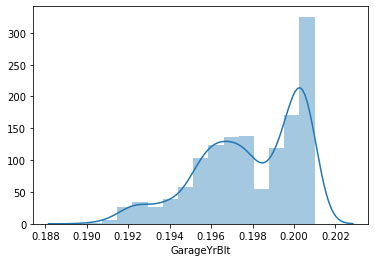

In [10]:
sns.distplot(df['GarageYrBlt'][~np.isnan(df['GarageYrBlt'])])

In [11]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)

df['YearBuilt'] = np.log(df['YearBuilt'])
df['GarageYrBlt'] = np.log(df['GarageYrBlt'])

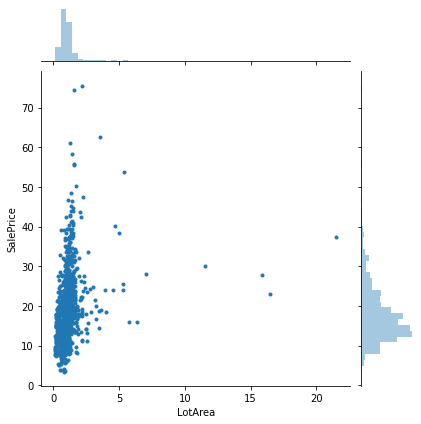

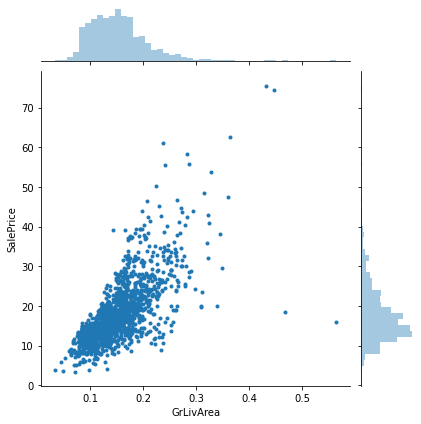

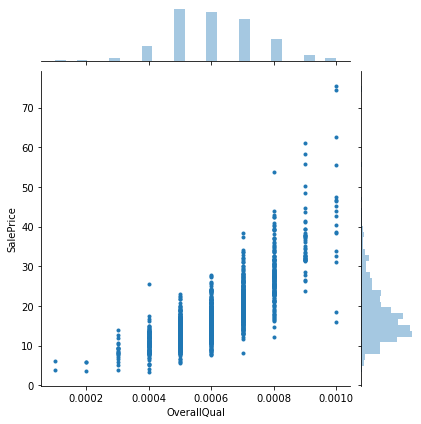

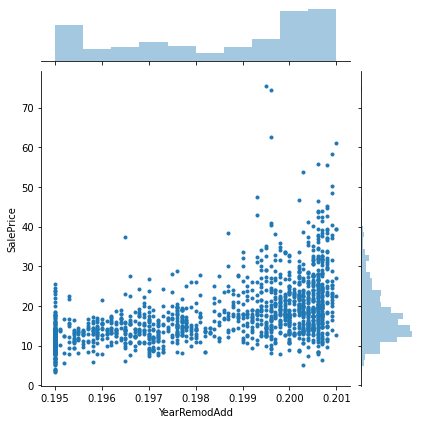

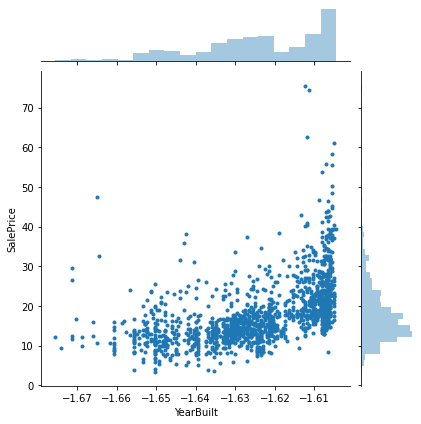

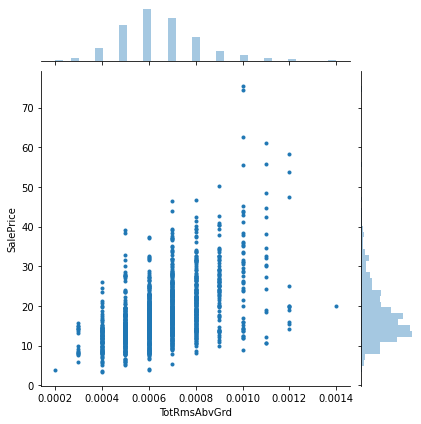

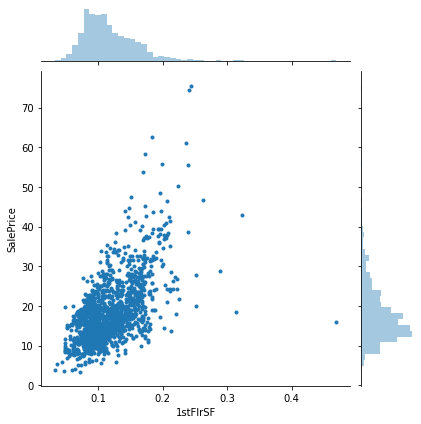

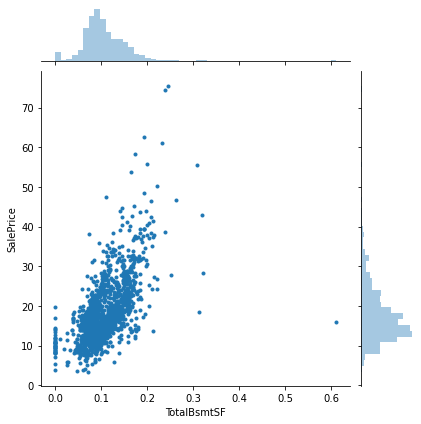

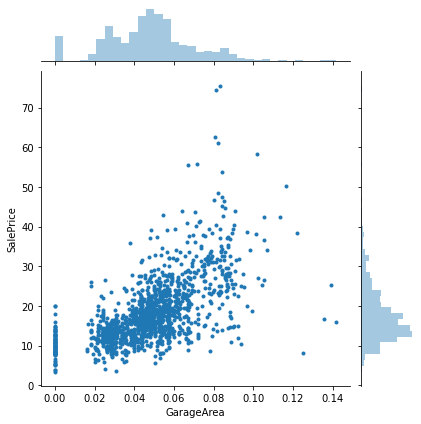

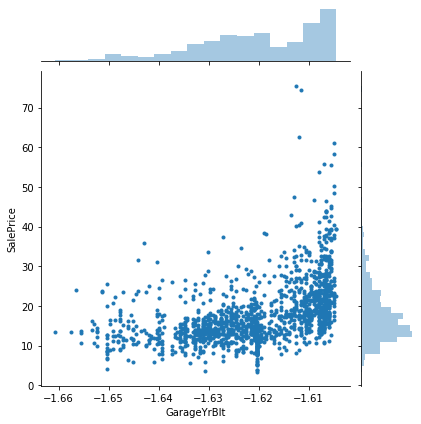

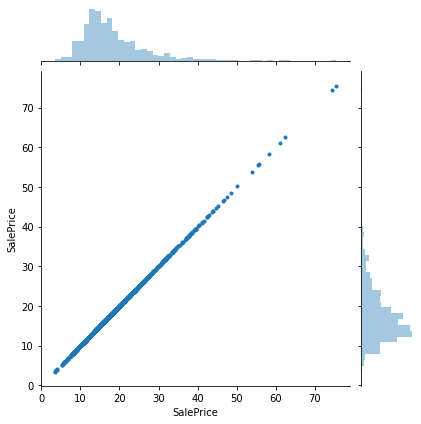

In [12]:
for i in df:
    sns.jointplot(i, 'SalePrice', df, marker='.')

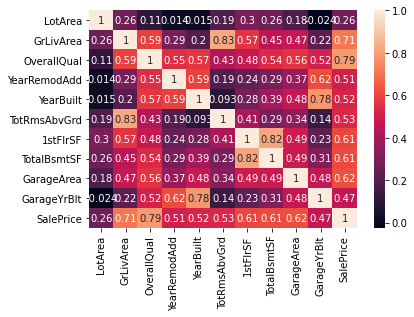

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
X, Y = np.array(df.drop('SalePrice', axis=1)), np.array(df['SalePrice'])

In [15]:
regressor = LinearRegression(0.01, 100000)

In [16]:
regressor.fit(X, Y)

In [17]:
regressor.weights, regressor.bias

(array([ 0.21760984, 68.5947558 ,  0.42498156,  7.95090883, 11.24759089,
         0.15169309, 26.44837847, 42.18909438, 39.25479782,  0.32932194]),
 15.28472634114209)

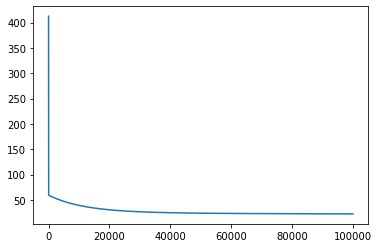

In [18]:
plt.plot(regressor.costs)

In [19]:
regressor.costs[-1]

22.23323824755033

In [20]:
pd.DataFrame([regressor.predict(X), Y], index=['Prediction', 'Actual']).transpose().corr()

,Prediction,Actual
Prediction,1.000000,0.805038
Actual,0.805038,1.000000


In [21]:
test = pd.read_csv('test.csv')[['LotArea', 'GrLivArea', 'OverallQual', 'YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageYrBlt']].apply(lambda x: x/10000)
test.head()

,LotArea,GrLivArea,OverallQual,YearRemodAdd,YearBuilt,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,GarageArea,GarageYrBlt
0,1.1622,0.0896,0.0005,0.1961,0.1961,0.0005,0.0896,0.0882,0.0730,0.1961
1,1.4267,0.1329,0.0006,0.1958,0.1958,0.0006,0.1329,0.1329,0.0312,0.1958
2,1.3830,0.1629,0.0005,0.1998,0.1997,0.0006,0.0928,0.0928,0.0482,0.1997
3,0.9978,0.1604,0.0006,0.1998,0.1998,0.0007,0.0926,0.0926,0.0470,0.1998
4,0.5005,0.1280,0.0008,0.1992,0.1992,0.0005,0.1280,0.1280,0.0506,0.1992


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1459 non-null   float64
 1   GrLivArea     1459 non-null   float64
 2   OverallQual   1459 non-null   float64
 3   YearRemodAdd  1459 non-null   float64
 4   YearBuilt     1459 non-null   float64
 5   TotRmsAbvGrd  1459 non-null   float64
 6   1stFlrSF      1459 non-null   float64
 7   TotalBsmtSF   1458 non-null   float64
 8   GarageArea    1458 non-null   float64
 9   GarageYrBlt   1381 non-null   float64
dtypes: float64(10)
memory usage: 114.1 KB


In [23]:
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean(), inplace=True)
test['GarageArea'].fillna(test['GarageArea'].mean(), inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean(), inplace=True)
test['YearBuilt'] = np.log(test['YearBuilt'])
test['GarageYrBlt'] = np.log(test['GarageYrBlt'])

In [24]:
testX = np.array(test)
testPred = regressor.predict(testX) * 10000

In [25]:
pred = pd.DataFrame(testPred)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets['Id'] = datasets['Id'].apply(int)

In [26]:
datasets.to_csv('submission.csv', index=False)